In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.spatial.distance import cdist

from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [3]:
df = pd.read_csv('df_to_clusters.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

In [3]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 96082 rows.
The DataFrame has 6 columns.


,FATALITIES,YEAR,INTERACTION,EVENT_TYPE,country_num,admin_num
0,0.0,0.999987,0.004955,0.000000,0.000496,0.000991
1,0.0,0.999987,0.004955,0.000000,0.000496,0.000991
2,0.0,0.999987,0.004955,0.000000,0.000496,0.000991
3,0.0,0.999987,0.004955,0.000000,0.000496,0.000991
4,0.0,0.999960,0.008919,0.000000,0.000496,0.000000
...,...,...,...,...,...,...
96077,0.0,0.999218,0.039514,0.000988,0.000494,0.000988
96078,0.0,0.999959,0.008902,0.000989,0.000495,0.000989
96079,0.0,0.999217,0.039534,0.000988,0.000494,0.000988
96080,0.0,0.999960,0.008902,0.000000,0.000495,0.000989


Text(0, 0.5, 'INTERACTION')

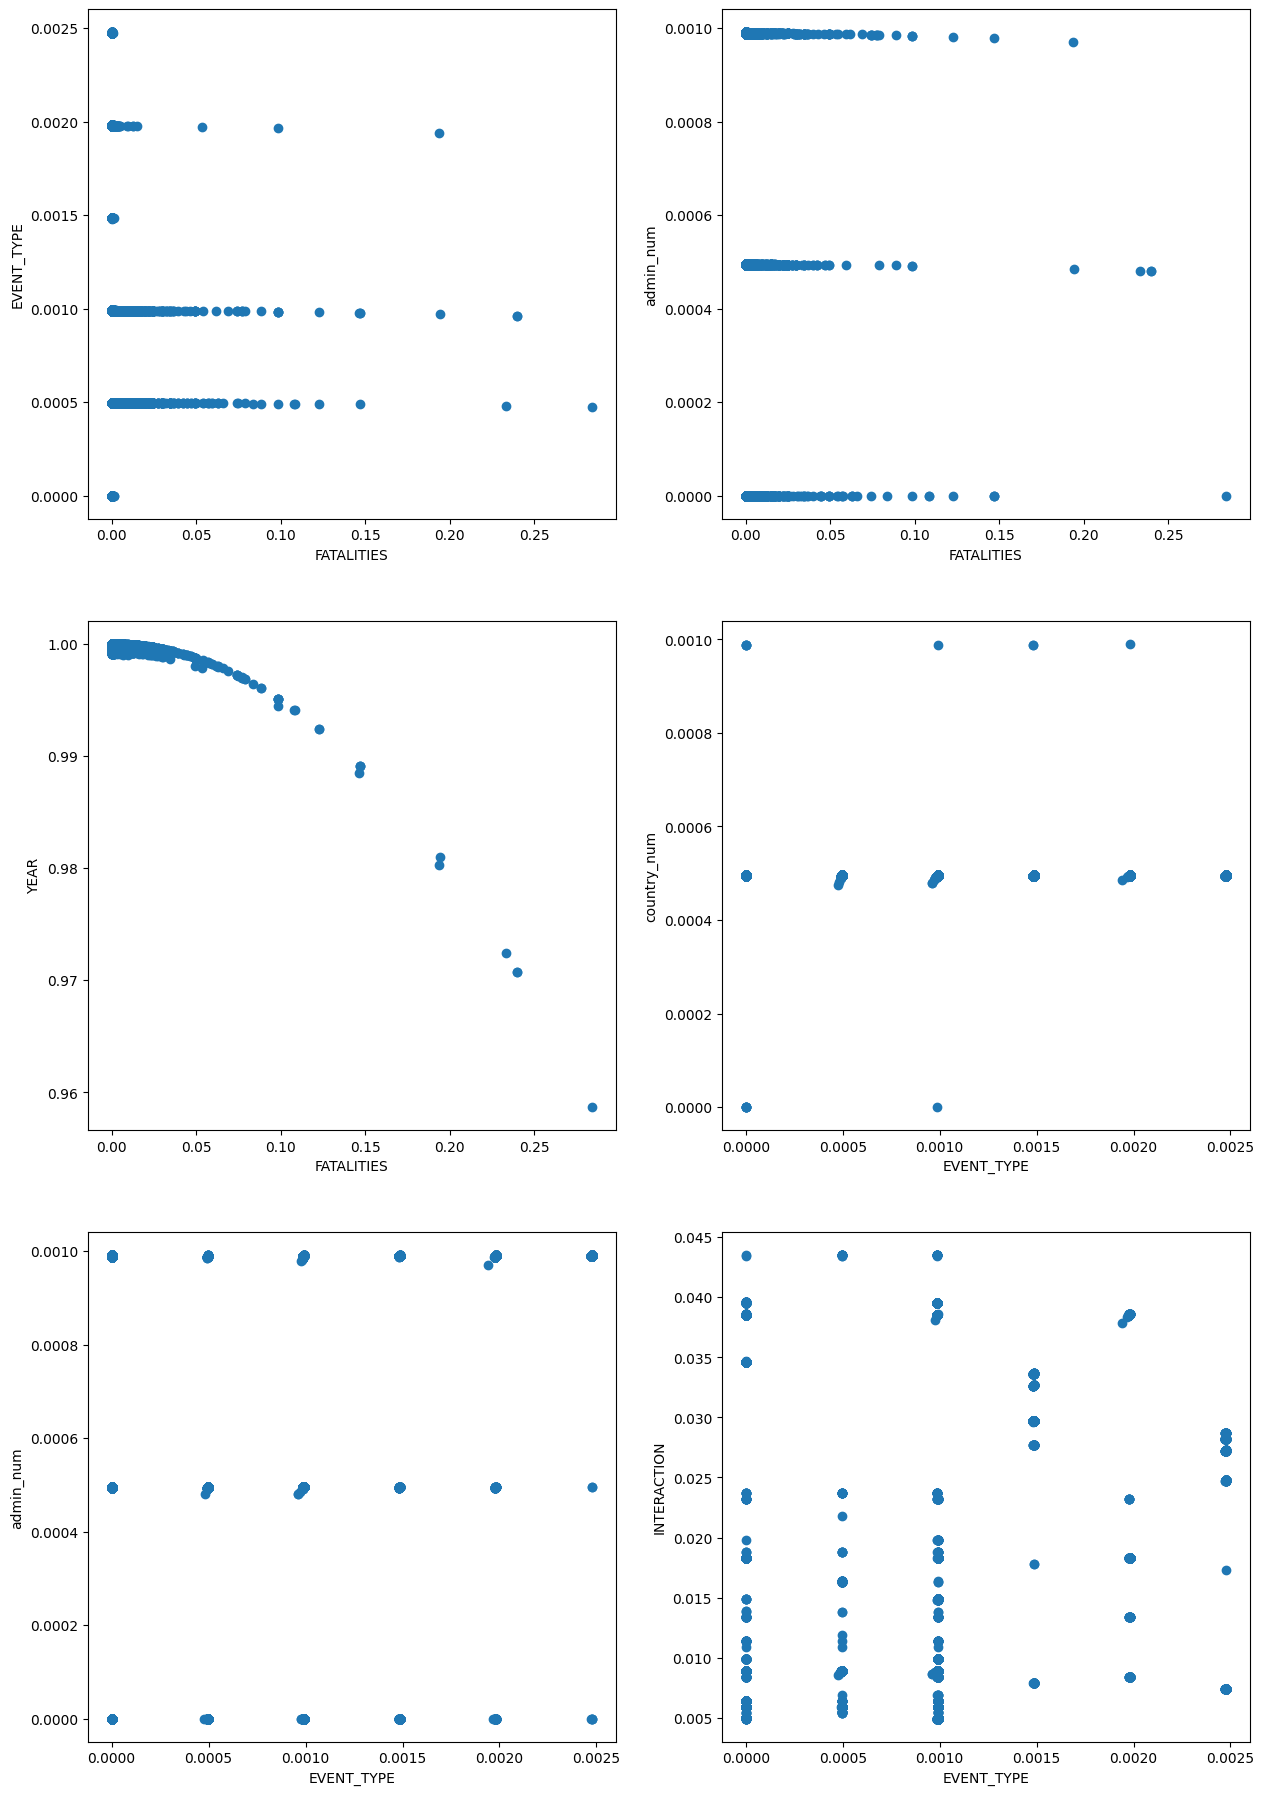

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(15, 22.5))
#Первый график рассеяния: смерти и тип события
ax[0][0].scatter(df["FATALITIES"], df["EVENT_TYPE"])
ax[0][0].set_xlabel("FATALITIES")
ax[0][0].set_ylabel("EVENT_TYPE")

#Второй график рассеяния: смерти и административный округ
ax[0][1].scatter(df["FATALITIES"], df["admin_num"])
ax[0][1].set_xlabel("FATALITIES")
ax[0][1].set_ylabel("admin_num")

#Второй график рассеяния: смерти и год
ax[1][0].scatter(df["FATALITIES"], df["YEAR"])
ax[1][0].set_xlabel("FATALITIES")
ax[1][0].set_ylabel("YEAR")

#Второй график рассеяния: тип события и страна
ax[1][1].scatter(df["EVENT_TYPE"], df["country_num"])
ax[1][1].set_xlabel("EVENT_TYPE")
ax[1][1].set_ylabel("country_num")

#Второй график рассеяния: тип события и административный округ
ax[2][0].scatter(df["EVENT_TYPE"], df["admin_num"])
ax[2][0].set_xlabel("EVENT_TYPE")
ax[2][0].set_ylabel("admin_num")

#Второй график рассеяния: тип события и количество взаимодействий
ax[2][1].scatter(df["EVENT_TYPE"], df["INTERACTION"])
ax[2][1].set_xlabel("EVENT_TYPE")
ax[2][1].set_ylabel("INTERACTION")

In [5]:
df_db = df[["INTERACTION", "EVENT_TYPE"]]
df_db = df_db.sample(frac=0.25, random_state=0)

clusters = list(range(2,9))

Для  2 кластеров : 0.9117816833331269
Для  3 кластеров : 0.9148408479549924
Для  4 кластеров : 0.8596987516488906
Для  5 кластеров : 0.8776920257990966
Для  6 кластеров : 0.8728489763025757
Для  7 кластеров : 0.8379655753388471
Для  8 кластеров : 0.8549168228817766


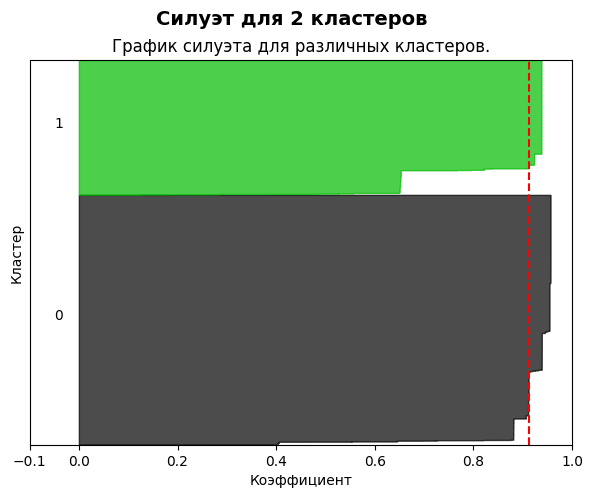

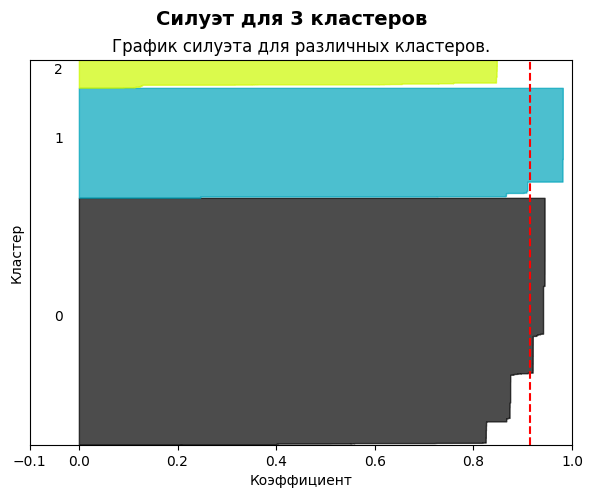

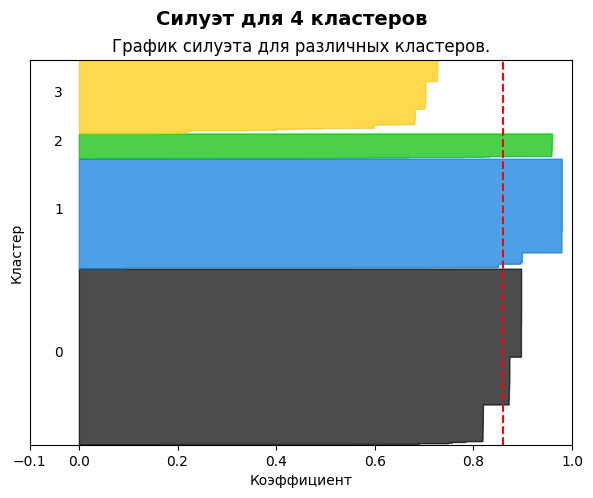

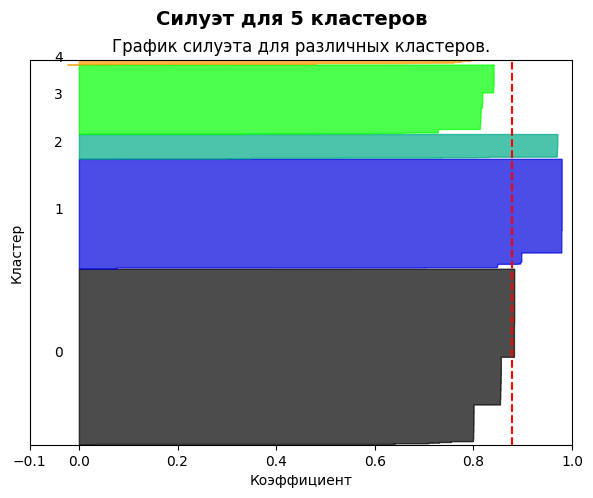

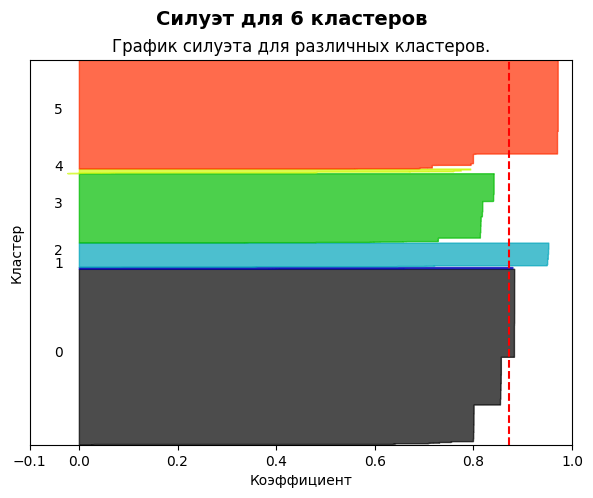

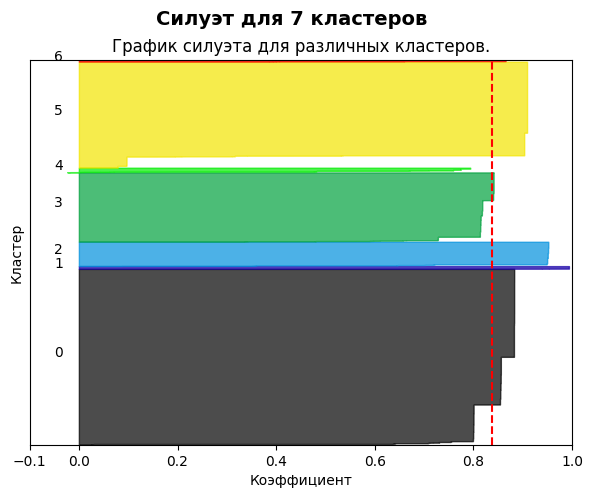

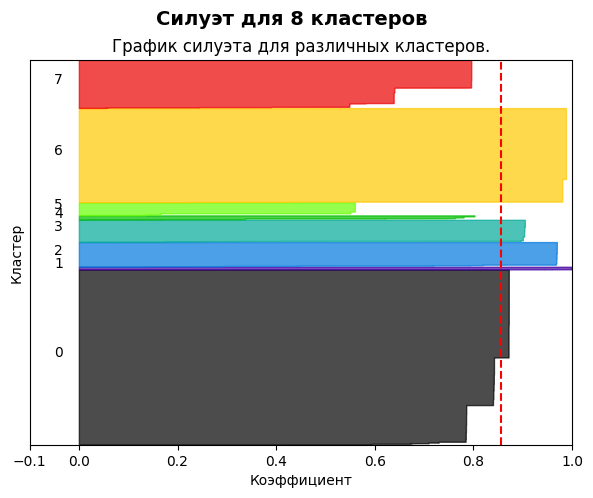

In [11]:

for n in clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_db) + (n + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_db)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_db, cluster_labels)
    print(
        "Для ",
        n,
        "кластеров :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_db, cluster_labels)

    y_lower = 10
    for i in range(n):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("График силуэта для различных кластеров.")
    ax1.set_xlabel("Коэффициент")
    ax1.set_ylabel("Кластер")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Силуэт для %d кластеров"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


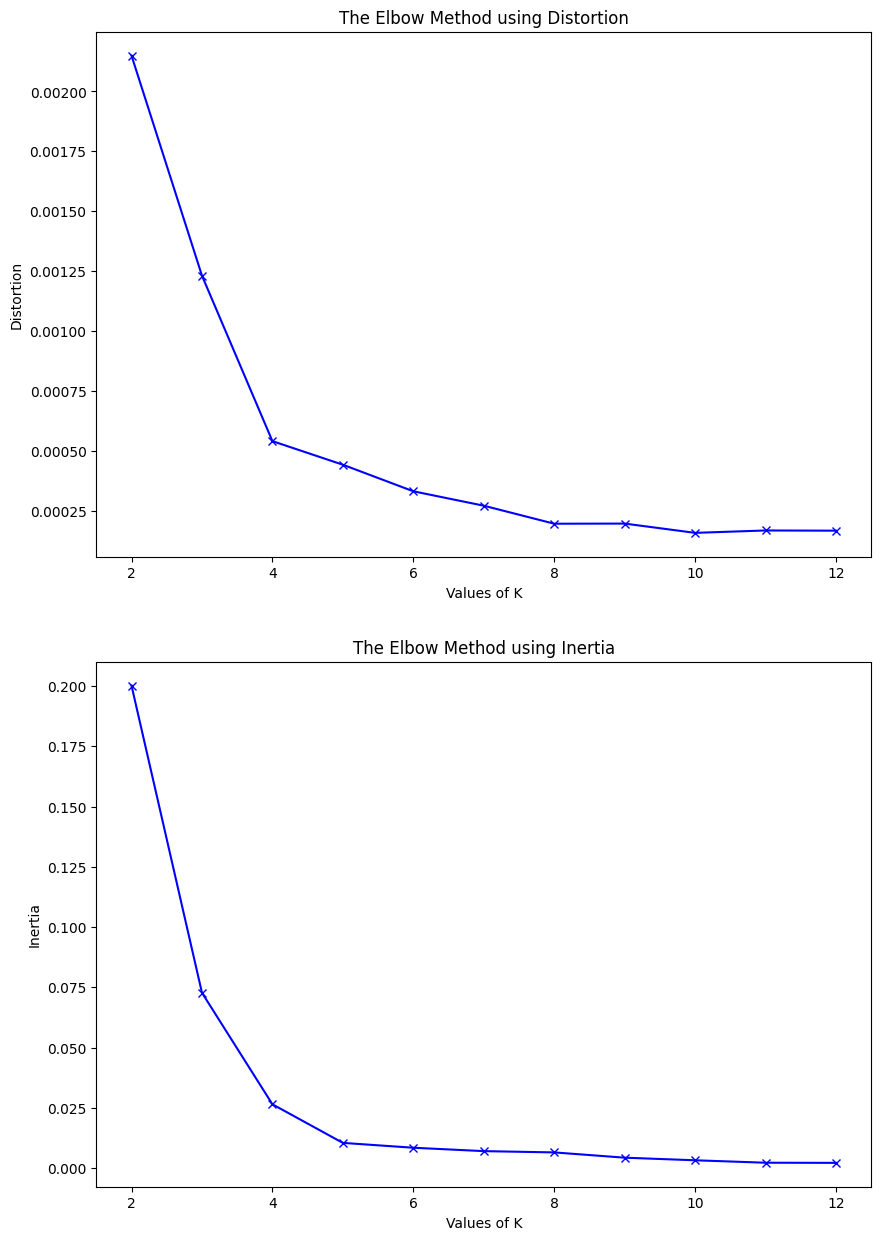

In [26]:
distortions = []
inertias = []
k_range = range(2, 13)
for k in k_range:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
    labels = kmeans.fit_predict(df_db)
 
    distortions.append(sum(np.min(cdist(df_db, kmeans.cluster_centers_,'euclidean'), axis=1)) / df_db.shape[0])
    inertias.append(kmeans.inertia_)
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(k_range, distortions, 'bx-')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')

ax2 = fig.add_subplot(212)
ax2.plot(k_range, inertias, 'bx-')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, max_iter=300 ,n_init="auto", algorithm="elkan")
kmeans.fit(df_db)

KMeans(algorithm='elkan', n_clusters=4, n_init='auto')

In [9]:
eps_vals = np.linspace(0.001, 0.01, 5)
min_samples_vals = list(range(10, 16))
df_db = df[["INTERACTION", "EVENT_TYPE"]]
df_db = df_db.sample(frac=0.25, random_state=0)


best_score = -1
best_eps = None
best_dbscan = None
best_min_samples = None
df_db

,INTERACTION,EVENT_TYPE
28508,0.018332,0.000000
90271,0.008897,0.000494
31665,0.005935,0.000989
87889,0.039514,0.000988
56450,0.038547,0.000988
...,...,...
52938,0.004946,0.000989
93360,0.008897,0.000989
50642,0.008902,0.000495
46057,0.029705,0.001485


In [10]:
# DBSCAN clustering
for eps in eps_vals:
    print("Eps: " + str(eps))
    for min_samples in min_samples_vals:
        print("Min samples: " + str(min_samples))
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        print("herre")
        # Fit the model
        labels = dbscan.fit_predict(df_db)
        
        # Ignore cases where the clustering resulted in only one cluster or noise
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_db, labels, sample_size=1000)
            
            # If the silhouette score is better, store these parameters as the best
            if score > best_score:
                best_dbscan = dbscan
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

Eps: 0.001
Min samples: 10
herre
Min samples: 11
herre
Min samples: 12
herre
Min samples: 13
herre
Min samples: 14
herre
Min samples: 15
herre
Eps: 0.0032500000000000003
Min samples: 10
herre
Min samples: 11
herre
Min samples: 12
herre
Min samples: 13
herre
Min samples: 14
herre
Min samples: 15
herre
Eps: 0.0055000000000000005
Min samples: 10
herre
Min samples: 11
herre
Min samples: 12
herre
Min samples: 13
herre
Min samples: 14
herre
Min samples: 15
herre
Eps: 0.007750000000000001
Min samples: 10
herre
Min samples: 11
herre
Min samples: 12
herre
Min samples: 13
herre
Min samples: 14
herre
Min samples: 15
herre
Eps: 0.01
Min samples: 10
herre
Min samples: 11
herre
Min samples: 12
herre
Min samples: 13
herre
Min samples: 14
herre
Min samples: 15
herre


In [11]:
print("Best eps: " + str(best_eps))
print("Best score: " + str(best_score))
print("Best min samples: " + str(best_min_samples))

Best eps: 0.0032500000000000003
Best score: 0.9275116367625751
Best min samples: 14


In [12]:
dbscan = best_dbscan

In [13]:
n_clusters_values = list(range(4, 10))
best_score = -1
best_n_clusters = None
best_h_clustering = None

In [14]:
# Agglomerative clustering
for n_clusters in n_clusters_values:
    print("N_clusters: " + str(n_clusters))
    h_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Fit the model
    labels = h_clustering.fit_predict(df_db)
    
    # Ignore cases where the clustering resulted in only one cluster or noise
    if len(np.unique(labels)) > 1:
        score = silhouette_score(df_db, labels, sample_size=1000)
        
        # If the silhouette score is better, store these parameters as the best
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_h_clustering = h_clustering

N_clusters: 4


N_clusters: 5
N_clusters: 6
N_clusters: 7
N_clusters: 8
N_clusters: 9


In [15]:
print("Best n_clusters: " + str(best_n_clusters))
print("Best score: " + str(best_score))

Best n_clusters: 5
Best score: 0.873132961886343


In [16]:
h_clustering = best_h_clustering

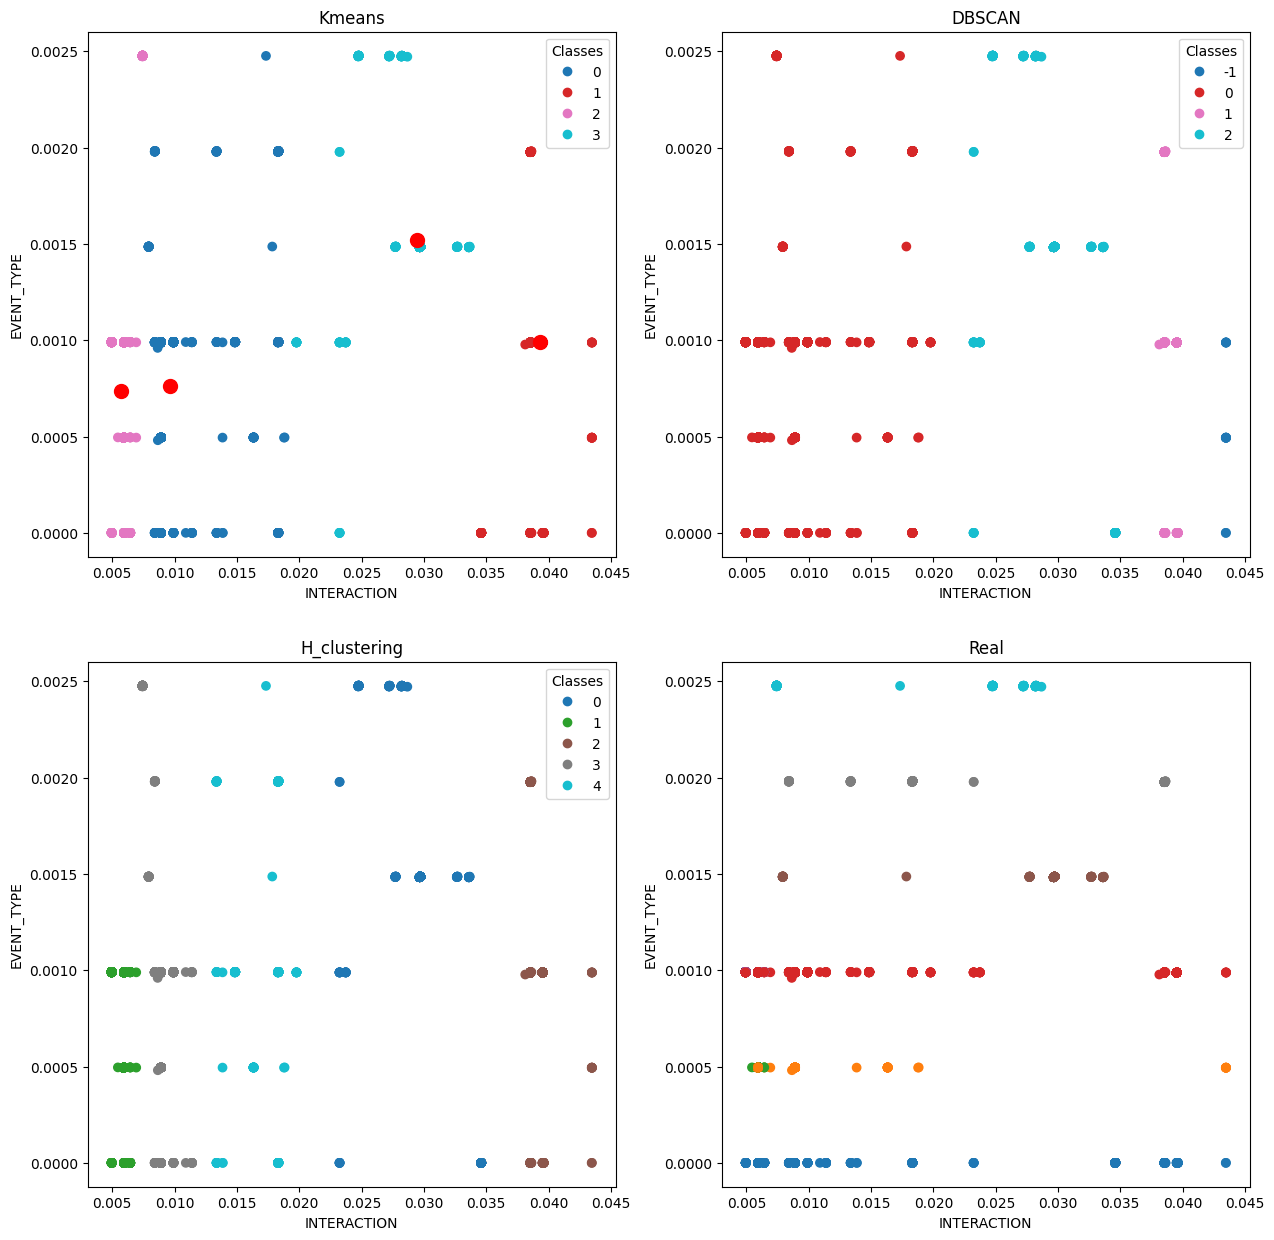

In [28]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df_db["INTERACTION"], df_db["EVENT_TYPE"], c=c, cmap='tab10')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
    if title != "Real":
        ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("INTERACTION")
    ax.set_ylabel("EVENT_TYPE")
    ax.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

prepare_and_plot(ax[0][0], kmeans.labels_, "Kmeans")
ax[0][0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
prepare_and_plot(ax[0][1], dbscan.labels_, "DBSCAN")
prepare_and_plot(ax[1][0], h_clustering.labels_, "H_clustering")
prepare_and_plot(ax[1][1], df_db["EVENT_TYPE"], "Real")